# Assignment 3 


__Required__ Use the provided data sets OECD_Trade.csv and OECD_GDP.csv to study Exports, Imports,
Net Exports (defined as Exports – Imports) of countries to/from other countries, and GDPs
of these individual countries.

Hint 1: Ensure that all your graphs are properly labelled.

Hint 2: To plot a legend outside of the chart, you can use
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)).

In [168]:
# import numpy for numeric calculation
import numpy as np

In [166]:
# import the pandas and the read_csv function
import pandas as pd
from pandas import read_csv

In [2]:
# import the plotting tool matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_oecd_trade = read_csv('OECD_Trade.csv')
df_oecd_gdp = read_csv('OECD_GDP.csv')

In [4]:
# THE DATA SHALL BE BASED ON THE PREVIOUS CLEANED DATA
df_input = df_oecd_trade.copy()

## Task 1

__Required__
Briefly explore the data sets (no visualizations required) and describe your findings. Make
any adjustments to the data sets as needed.

__Answer__:

### Overview

A quick scan of task 2 to 5 tells us that we only concern on the individual country level data. Therefore, we do not need the data for international organizations, such as G20, OPEC, etc.

For trade data, we need to analyze the flows of export and import.

For GDP data, we are only interested in the country level as well.

To uniform the input, we are going to use the standard column name, with space replace by "_".

### OECD_Trade.csv

#### Data Screening

In [26]:
df_oecd_trade.head(5)

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN


In [24]:
df_oecd_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               29222 non-null  object 
 1   Reporter country       29222 non-null  object 
 2   FLOW                   29222 non-null  object 
 3   Flow                   29222 non-null  object 
 4   PARTNER                29222 non-null  object 
 5   Partner country        29222 non-null  object 
 6   FREQUENCY              29222 non-null  object 
 7   Frequency              29222 non-null  object 
 8   TIME                   29222 non-null  int64  
 9   Time                   29222 non-null  int64  
 10  Unit Code              29222 non-null  object 
 11  Unit                   29222 non-null  object 
 12  PowerCode Code         29222 non-null  int64  
 13  PowerCode              29222 non-null  object 
 14  Reference Period Code  0 non-null      float64
 15  Re

The trade data includes 19 columns. Among these, the all capitalized name data columns have the same information to the standard name data columns (for example, in FLOW, EXP refers to Export in Flow).

Since we are only interested in the import ane export data for individual country. We only need the following columns -

Reporter Country, Flow, Partner country, Time, Value

##### Reporter Country

In [30]:
df_oecd_trade['Reporter country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Slovenia', 'Lithuania', 'Latvia',
       'European Union (28 countries)'], dtype=object)

The *European Union (28 countries)* is not an individual country. We will need to remove this row.

##### Flow

In [40]:
df_oecd_trade['Flow'].unique()

array(['Exports', 'Imports'], dtype=object)

The column **Flow** contains two types of data, *Exports* and *Imports*.

##### Partner country

In [45]:
df_oecd_trade['Partner country'].unique()

array(['Austria', 'Belgium', 'Canada', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Argentina', 'Brazil', 'Chile',
       "China (People's Republic of)", 'Estonia', 'India', 'Indonesia',
       'Israel', 'Russia', 'Saudi Arabia', 'Slovenia', 'South Africa',
       'Australia', 'OECD - Total', 'G20', 'Latvia', 'Lithuania',
       'Costa Rica', 'Colombia'], dtype=object)

Following entries are **not** individual country entry. We will remove them from the input


*OECD - Total*

*G20*

##### Time

In [55]:
df_oecd_trade['Time'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2010])

The column **Time** is a series of year data from 2010 to 2018 continuously. It is in *int* type. Since we do not involve the month, day, hour and other time data, we feel comfortable of using integer to indicate the time in this question.

##### Value

The column **Value** is in integer type. It is better to convert in into float type.

#### Data Cleaning

In [92]:
# Created copy
df_in_trade = df_oecd_trade.copy()

# Retrieve required data
list_in_trade = ['Reporter country', 'Flow', 'Partner country', 'Time', 'Value']

# Standarized column name
dict_in_trade = {key: key.lower().replace(' ', '_') for key in list_in_trade}

# Work on the data
df_in_trade = df_in_trade[list_in_trade].rename(columns=dict_in_trade)

df_in_trade = df_in_trade[# Filter begins here
    # filter out the Europen Union in reporter country
    (df_in_trade.reporter_country != 'European Union (28 countries)') &
    # filter out the OECD - Total and the G20
    (~df_in_trade.partner_country.isin(['OECD - Total', 'G20']))]

# Change value to float type

df_in_trade.value = df_in_trade.value.astype(float)

# Check the final result
df_in_trade.info()

df_in_trade.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27728 entries, 0 to 29036
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reporter_country  27728 non-null  object 
 1   flow              27728 non-null  object 
 2   partner_country   27728 non-null  object 
 3   time              27728 non-null  int64  
 4   value             27728 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


,reporter_country,flow,partner_country,time,value
0,Australia,Exports,Austria,2011,73144918.0
1,Australia,Exports,Austria,2012,71483059.0
2,Australia,Exports,Austria,2013,67897422.0
3,Australia,Exports,Austria,2014,61114752.0
4,Australia,Exports,Austria,2015,54730242.0


### OECD_GDP.csv


#### Data Screening

In [95]:
df_oecd_gdp.info()
df_oecd_gdp.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               345 non-null    object 
 1   Country                345 non-null    object 
 2   TRANSACT               345 non-null    object 
 3   Transaction            345 non-null    object 
 4   MEASURE                345 non-null    object 
 5   Measure                345 non-null    object 
 6   TIME                   345 non-null    int64  
 7   Year                   345 non-null    int64  
 8   Unit Code              345 non-null    object 
 9   Unit                   345 non-null    object 
 10  PowerCode Code         345 non-null    int64  
 11  PowerCode              345 non-null    object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  345 non-null    float64
 15  Flag C

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,1.299463e+06,NaN,NaN
1,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2011,2011,USD,US Dollar,6,Millions,NaN,NaN,1.546689e+06,NaN,NaN
2,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2012,2012,USD,US Dollar,6,Millions,NaN,NaN,1.590708e+06,NaN,NaN
3,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2013,2013,USD,US Dollar,6,Millions,NaN,NaN,1.543216e+06,NaN,NaN
4,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2014,2014,USD,US Dollar,6,Millions,NaN,NaN,1.464256e+06,NaN,NaN


The trade data includes 17 columns. Among these, the all capitalized name data columns have the same information to the standard name data columns (for example, in LOCATION, AUS refers to Australia in Country).

The GDP data contains GDP value for each country. We need to check if they are in the same measuring scale (like Unit, PowerCode, etc.) If they are not in the same measuring scale, we need to convert them to the same measuring scale. If they are in the same measuring scale, we will drop this column.

We are only interested in the country column and the value. We will go through each column despite the Value column.

In [96]:
for col in df_oecd_gdp.columns:
    # we don't need to check the Value column
    if col == 'Value':
        break;
    print('column \'{}\' unique value is : {}'.format(col, df_oecd_gdp[col].unique()))

column 'LOCATION' unique value is : ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'LUX' 'MEX'
 'PRT' 'ESP' 'SWE' 'CHE' 'GBR' 'EST' 'CHN' 'RUS' 'CHL' 'SVK' 'NZL' 'IRL'
 'HUN' 'POL' 'IDN' 'IND' 'KOR' 'JPN' 'SVN' 'ISL' 'NLD' 'NOR' 'TUR' 'ITA'
 'USA' 'EU28' 'ISR' 'BRA']
column 'Country' unique value is : ['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Luxembourg' 'Mexico' 'Portugal'
 'Spain' 'Sweden' 'Switzerland' 'United Kingdom' 'Estonia'
 "China (People's Republic of)" 'Russia' 'Chile' 'Slovak Republic'
 'New Zealand' 'Ireland' 'Hungary' 'Poland' 'Indonesia' 'India' 'Korea'
 'Japan' 'Slovenia' 'Iceland' 'Netherlands' 'Norway' 'Turkey' 'Italy'
 'United States' 'European Union (28 countries)' 'Israel' 'Brazil']
column 'TRANSACT' unique value is : ['B1_GA']
column 'Transaction' unique value is : ['Gross domestic product (output approach)']
column 'MEASURE' unique value is : ['CXC']
column 'Measure' unique value is 

We can find that the **Value** data is in million US dollars.

We find that **all columns** except **LOCATION**, **Country**, **TIME** and **Year** include only one value. Therefore, We can safely only reamin the following columns to restrict our analysis.

We only need following columns -

Country
Year
Value

##### Country
The *European Union (28 countries)* is not an individual country. We will need to remove this row. What's more, in order to be in the same as the trade data, we shall rename this column into **reporter_country**

##### Year
The column **Year** is a series of year data from 2010 to 2018 continuously. It is in *int* type. Since we do not involve the month, day, hour and other time data, we feel comfortable of using integer to indicate the time in this question. What's more, in order to be in the same as the trade data, we shall rename this column into **time**


##### Value
We feel comfortable about the column **Value**.

#### Data Cleaning

In [99]:
# Created copy
df_in_gdp = df_oecd_gdp.copy()

# Retrieve required data
list_in_gdp = ['Country', 'Year', 'Value']

# Standarized column name
dict_in_gdp = {'Country':'reporter_country', 'Year':'time','Value':'value'}

# Work on the data
df_in_gdp = df_in_gdp[list_in_gdp].rename(columns=dict_in_gdp)

df_in_gdp = df_in_gdp[# Filter begins here
    # filter out the Europen Union in reporter country
    (df_in_gdp.reporter_country != 'European Union (28 countries)')]


# Check the final result
df_in_gdp.info()

df_in_gdp.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 344
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   reporter_country  336 non-null    object 
 1   time              336 non-null    int64  
 2   value             336 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.5+ KB


,reporter_country,time,value
0,Australia,2010,1.299463e+06
1,Australia,2011,1.546689e+06
2,Australia,2012,1.590708e+06
3,Australia,2013,1.543216e+06
4,Australia,2014,1.464256e+06


### Sum up

We now have prepared two input data - *df_in_trade* and *df_in_gdp*, for our following question. All of these data has an time range from 2010 to 2018. The share same standard column names.

## Task 2A

i. Create a line chart showing the total annual import and export of all countries combined
for each year from 2010 to 2018.

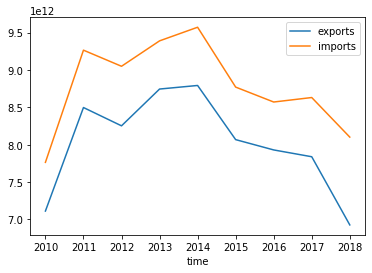

In [133]:
# From Task 1, we know the year range is from 2010 to 2018, so no filter shall be adopted to this question.
# In the following question, unless specified, we will not adopt filter to the time column

# We want to sum them by the time and flow level (ignore country) (sum()). We want to unstack the last column flow into
# two specified columns (unstack()).
df_exports_imports_time_all = df_in_trade.set_index(
    ['reporter_country', 'time', 'flow']).groupby(['time', 'flow']).sum().unstack().reset_index()

# reassign standard column names
df_exports_imports_time_all.columns = ['time', 'exports', 'imports']

# set index for time, which is the x-asix
df_exports_imports_time_all = df_exports_imports_time_all.set_index('time')

# plot
df_exports_imports_time_all.plot()

ii. Create a line chart showing the total net export of all countries combined for each year
from 2010 to 2018.

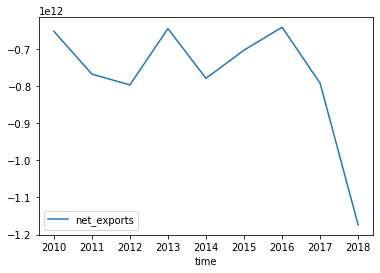

In [194]:
# This question will be based on the Task 2A - i. Run Task 2A - i before you run this cell.
df_exports_imports_netexports_all = df_exports_imports_time_all.copy()

df_exports_imports_netexports_all['net_exports'] = df_exports_imports_netexports_all.exports - df_exports_imports_netexports_all.imports

pd.DataFrame(df_exports_imports_netexports_all.net_exports).plot()

iii. Create a line chart showing the total GDP of all countries combined for each year from
2010 to 2018.

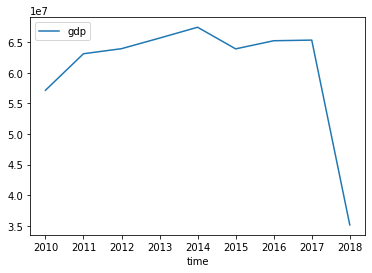

In [205]:
# This is based on the GDP data
df_gdp_all = df_in_gdp.groupby(['time']).sum().rename(columns={'value':'gdp'})
df_gdp_all.plot()

iv. Do you detect any anomalies in the GDP chart? If so, what might be the cause?

Yes. We find the total GDP of 2018 drops significantly. However, there are not severe crisis in 2018 (like Word War or financial crisis in 1921). But the data in 2017 appears to be normal comparing to the previous data. We want to check what causes the sudden drop of result from 2017 to 2018.

In [206]:
df_gdp_by_country_20172018 = df_in_gdp[(df_in_gdp.time == 2017) | (df_in_gdp.time == 2018)].set_index(['reporter_country', 'time']).unstack().reset_index()
df_gdp_by_country_20172018.columns = ['country', '2017' , '2018']
df_gdp_by_country_20172018[df_gdp_by_country_20172018.isnull().any(axis=1)]

,country,2017,2018
0,Australia,1.416105e+06,NaN
3,Canada,1.647120e+06,NaN
14,Iceland,2.448949e+04,NaN
15,India,2.575667e+06,NaN
18,Israel,3.532684e+05,NaN
20,Japan,4.859951e+06,NaN
21,Korea,1.530751e+06,NaN
23,Mexico,1.158229e+06,NaN
35,United States,1.948539e+07,NaN


From the previous table, we find there are many missing data in this table. We are missing data from many countries, including some major countries.

## Task 2B

i. Using the annual summaries you created in the previous part A of this task, create six
scatterplots, pairwise, of the measures export, import, net export and GDP.

In [198]:
# Prepare data
df_exports_imports_netexports_all.head(5)

df_gdp_all.head(5)

,exports,imports,net_exports
time,,,
2010,7.112767e+12,7.764138e+12,-6.513710e+11
2011,8.497087e+12,9.264077e+12,-7.669896e+11
2012,8.252388e+12,9.048671e+12,-7.962827e+11
2013,8.744195e+12,9.388439e+12,-6.442436e+11
2014,8.792034e+12,9.570496e+12,-7.784620e+11


Text(0.5, 1.0, 'Net Exports vs GDP')

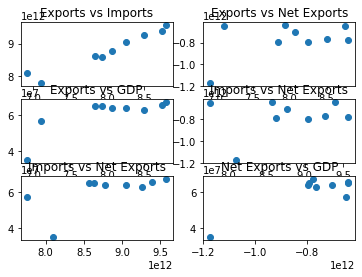

In [219]:
# We are going to plot on a 3 * 2 subplot
plt.clf()
# exports vs imports
plt.subplot(3, 2, 1)
plt.scatter(df_exports_imports_netexports_all.exports, df_exports_imports_netexports_all.imports)
plt.title('Exports vs Imports')

# exports vs net exports
plt.subplot(3, 2, 2)
plt.scatter(df_exports_imports_netexports_all.exports, df_exports_imports_netexports_all.net_exports)
plt.title('Exports vs Net Exports')

# exports vs gdp
plt.subplot(3, 2, 3)
plt.scatter(df_exports_imports_netexports_all.exports, df_gdp_all.gdp)
plt.title('Exports vs GDP')

# imports vs net exports
plt.subplot(3, 2, 4)
plt.scatter(df_exports_imports_netexports_all.imports, df_exports_imports_netexports_all.net_exports)
plt.title('Imports vs Net Exports')

# imports vs gdp
plt.subplot(3, 2, 5)
plt.scatter(df_exports_imports_netexports_all.imports, df_gdp_all.gdp)
plt.title('Imports vs Net Exports')

# net exports vs gdp
plt.subplot(3, 2, 6)
plt.scatter(df_exports_imports_netexports_all.net_exports, df_gdp_all.gdp)
plt.title('Net Exports vs GDP')

#plt.tight_layout()

ii. Briefly describe the scatterplots.

From the scatterplots, we suspect there is a strong linear correlation between the **exports** and **imports**.

In [218]:
df_exports_imports_netexports_all.merge(df_gdp_all, left_index=True, right_index=True).corr()

,exports,imports,net_exports,gdp
exports,1.000000,0.970302,0.473532,0.772387
imports,0.970302,1.000000,0.246410,0.618516
net_exports,0.473532,0.246410,1.000000,0.842490
gdp,0.772387,0.618516,0.842490,1.000000


The previous figure indicates that the correlation between **exports** and **imports** is 0.97. This is very significant.

It also shows that the correlation between **net exports** and **GDP** is 0.84. However, the scatterplot of these two variables indicates that the data are crowded in the right up corner. We could not safely get the correlation relationship between these two variables.

## Task 4


Create an unstacked and a stacked bar chart showing the total annual net export for each
country each year from 2010 to 2018.

Answer - We will prepare the data for each country each year from 2010 to 2018

In [6]:
# Get the required columns
cols = ['Reporter country', 'Partner country', 'Time' ,'Value', 'Flow']
key_cols = ['Reporter country', 'Partner country', 'Time', 'Flow']

# Filter the year from 2010 t0 2018
df_q4 = df_input[((df_oecd_trade.Time>=2010) 
                       & (df_oecd_trade.Time<=2018))][cols]

# Groupby each columns
df_q4 = df_q4.groupby(key_cols).sum().unstack('Flow').reset_index()

# Set column namess
df_q4.columns = ['Reporter country', 'Partner country', 'Time' ,'Exports', 'Imports']

# Calcualte the net exports as the exports minus the imports
df_q4['Net Exports'] = df_q4['Exports'] - df_q4['Imports']

# Drop the columns Exports and Imports
df_q4 = df_q4.drop(['Exports', 'Imports'], axis=1)

df_q4

,Reporter country,Partner country,Time,Net Exports
0,Australia,Argentina,2011,-3.185925e+08
1,Australia,Argentina,2012,-5.683728e+08
2,Australia,Argentina,2013,-7.068296e+08
3,Australia,Argentina,2014,-6.447370e+08
4,Australia,Argentina,2015,-5.512483e+08
...,...,...,...,...
14768,United States,United Kingdom,2014,-1.122518e+09
14769,United States,United Kingdom,2015,-2.387252e+09
14770,United States,United Kingdom,2016,1.791390e+08
14771,United States,United Kingdom,2017,2.349492e+09


In [7]:
# Analysis of the data
list_export_country =  list(df_q4['Reporter country'].unique())
len(list_export_country)

37

1) Unstacked bar chart showing the annual net export for each country each year from 2010 to 2018

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a237cbd50>,
      dtype=object)

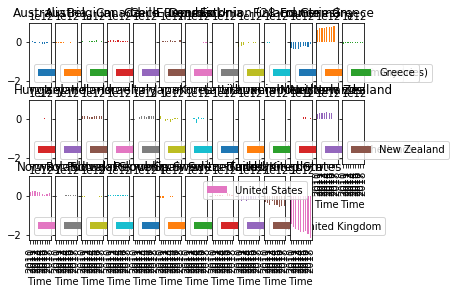

In [8]:
df_q41 = df_q4.groupby(['Reporter country', 'Time']).sum().reset_index()
df_q41 = df_q41.set_index(['Time', 'Reporter country']).unstack('Reporter country').reset_index()
df_q41.columns = ['Time','Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'European Union (28 countries)', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']
df_q41 = df_q41.set_index('Time')
df_q41.plot(kind='bar', subplots=True, layout=(3,13), sharey=True, sharex=True)
#plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

2) Stacked bar chart showing the annual net export for each country each year from 2010 to 2018

AttributeError: 'Line2D' object has no property 'kind'

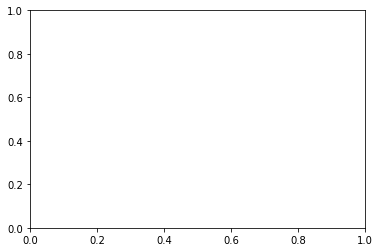

In [9]:
i = 0
country = list_export_country[i]
df_country_data_1 = df_q4[
                (df_q4['Reporter country'] == country)][['Net Exports','Time']].groupby('Time').sum()
df_country_data_2 = df_q4[
    df_q4['Reporter country'] == country].set_index(
    ['Time', 'Partner country']).unstack(level=-1)
plt.plot([df_country_data_1, df_country_data_2], kind='bar', stacked=True)

#myplot = df_country_data.plot(kind='bar', stacked=True)
#myplot.legend(df_q4['Partner country'].unique(), loc='center left', bbox_to_anchor=(1,0.5))

## Task 5

i. Create a line chart showing the ranks of the top 10 export partner of Canada each year
from 2010 to 2018.

Hint: pandas.DataFrame.rank might be useful here.

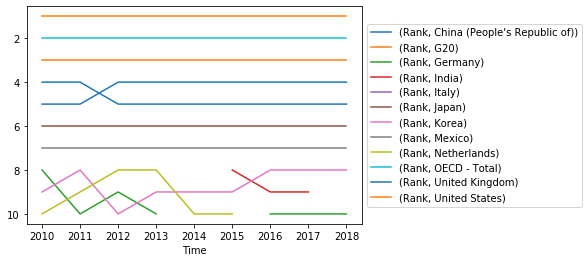

In [10]:
df_canada_export = df_input[(df_input['Reporter country'] == 'Canada') 
                            & (df_input['Flow'] == 'Exports')
                            & (df_input['Time'] >= 2010)
                            & (df_input['Time'] <= 2018)][
    ['Partner country', 'Time', 'Value']]

# loop on year
df_canada_export['Rank'] = df_canada_export.groupby(['Time'])['Value'].rank(ascending=False)
    
df_canada_export_rank = df_canada_export[df_canada_export.Rank <= 10][['Time', 'Partner country', 'Rank']].set_index(['Time', 'Partner country'])

myplot = df_canada_export_rank.unstack().plot()
myplot.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.gca().invert_yaxis()

ii. What is the rank of Japan in export among major Canadian trading partners?


In [11]:
df_canada_export[df_canada_export['Partner country']=='Japan'][['Partner country', 'Time', 'Rank']]

,Partner country,Time,Rank
1080,Japan,2010,6.0
1081,Japan,2011,6.0
1082,Japan,2012,6.0
1083,Japan,2013,6.0
1084,Japan,2014,6.0
1085,Japan,2015,6.0
1086,Japan,2016,6.0
1087,Japan,2017,6.0
1088,Japan,2018,6.0


Answer - The ranks of Japan in export among major Canadian trading partners are always 6 from 2010 to 2018

iii. When does China overtake the United Kingdom to be the 2nd largest export partner of
Canada?

In [20]:
df_q53 = df_canada_export[
    (df_canada_export['Partner country'].str.contains('China'))|
    (df_canada_export['Partner country'].str.contains('United Kingdom'))][
    ['Partner country', 'Time', 'Rank']].set_index(['Time', 'Partner country'])

In [21]:
df_q53 = df_q53.unstack()
df_q53.columns = ['China', 'UK']


In [22]:
df_q53['Diff'] = df_q53.China - df_q53.UK

In [23]:
df_q53

,China,UK,Diff
Time,,,
2010,5.0,4.0,1.0
2011,5.0,4.0,1.0
2012,4.0,5.0,-1.0
2013,4.0,5.0,-1.0
2014,4.0,5.0,-1.0
2015,4.0,5.0,-1.0
2016,4.0,5.0,-1.0
2017,4.0,5.0,-1.0
2018,4.0,5.0,-1.0


Answer - China overtakes the United Kingdom to be the 2nd largest export partner of
Canada in 2012.